# Lab 1

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
%matplotlib inline

## C1.1 Побудування гiстограми частот появи лiтер в тексті. 

In [94]:
# Load data 
import codecs
f = codecs.open('loremipsum.txt', 'r', 'utf-8')
text = f.read()
f.close()
f = codecs.open('misto.txt', 'r', 'utf-8')
misto_txt = f.read()
f.close()

In [95]:
def flat_nested(nested, flatten=[]):
    for i in nested:
        if type(i) == list:
            flat_nested(i)
        elif i!='':
            flatten.append(i)
    return flatten

def cleaner(text): 
    return re.findall(r'[а-яґєії]',  text)

In [96]:
# функция для поиска частоты встречаемости буквы
def find_frequency(dct):
    return dict(zip(list(dct.keys()), list((np.array(list(dct.values()))/sum(dct.values()))*100)))

In [97]:
def sort_dict(labels):
    lst_sort_values = []
    lst_sort_keys = sorted(list(labels.keys()))
    for i in lst_sort_keys:
        lst_sort_values.append(labels[i])
    return dict(zip(lst_sort_keys, lst_sort_values))

In [98]:
letters_from_text = cleaner(text.lower())
l_from_misto = cleaner(misto_txt.lower())

In [99]:
from collections import Counter, defaultdict 

l_text = find_frequency(sort_dict(dict(Counter(letters_from_text).most_common(33))))
l_misto = find_frequency(sort_dict(dict(Counter(l_from_misto).most_common(33))))

In [8]:
import seaborn as sns
def letters_freq_plt(labels, name):
    plt.figure(figsize = (25, 11))
    ax = sns.barplot(list(labels.keys()), list(labels.values()), alpha = 0.8)
    plt.title(name)
    plt.ylabel('Частота', fontsize = 12)
    plt.xlabel('Літери', fontsize = 12)
    rects = ax.patches
    labels = list(labels.values())
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha = 'center', va = 'bottom')
    plt.show()

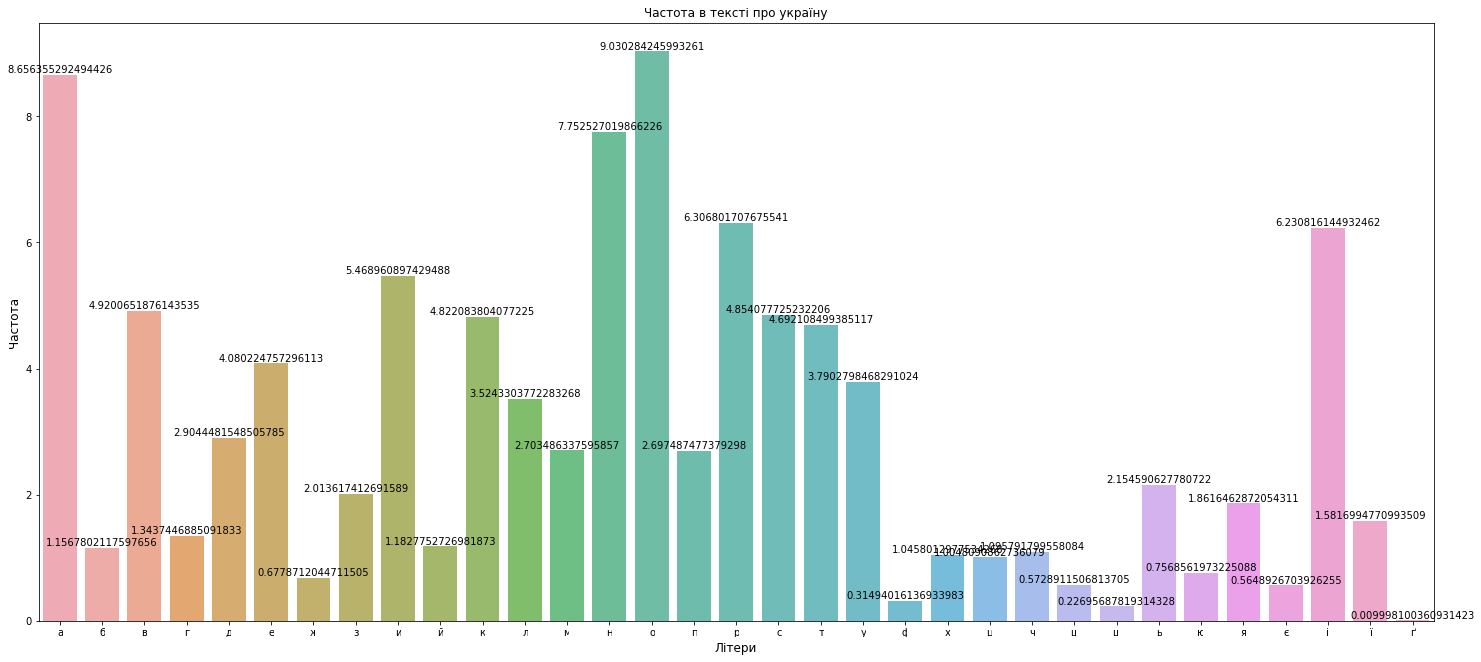

In [9]:
name = "Частота в тексті про україну"
labels1 = dict(l_text)
letters_freq_plt(labels1, name)

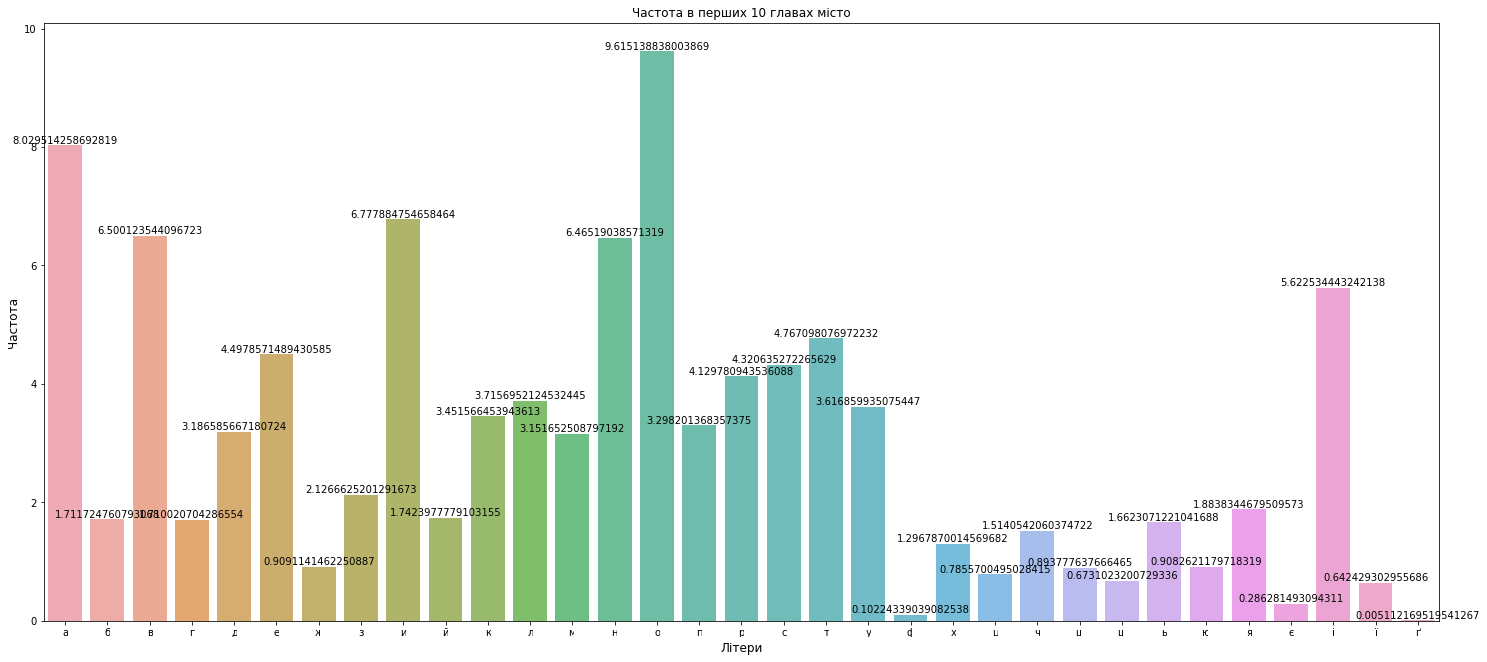

In [10]:
name = "Частота в перших 10 главах місто"
labels2 = dict(l_misto)
letters_freq_plt(labels2, name)

In [11]:
print(sum(dict(Counter(letters_from_text).most_common(33)).values()))
print(sum(dict(Counter(l_from_misto).most_common(33)).values()))

100019
117367


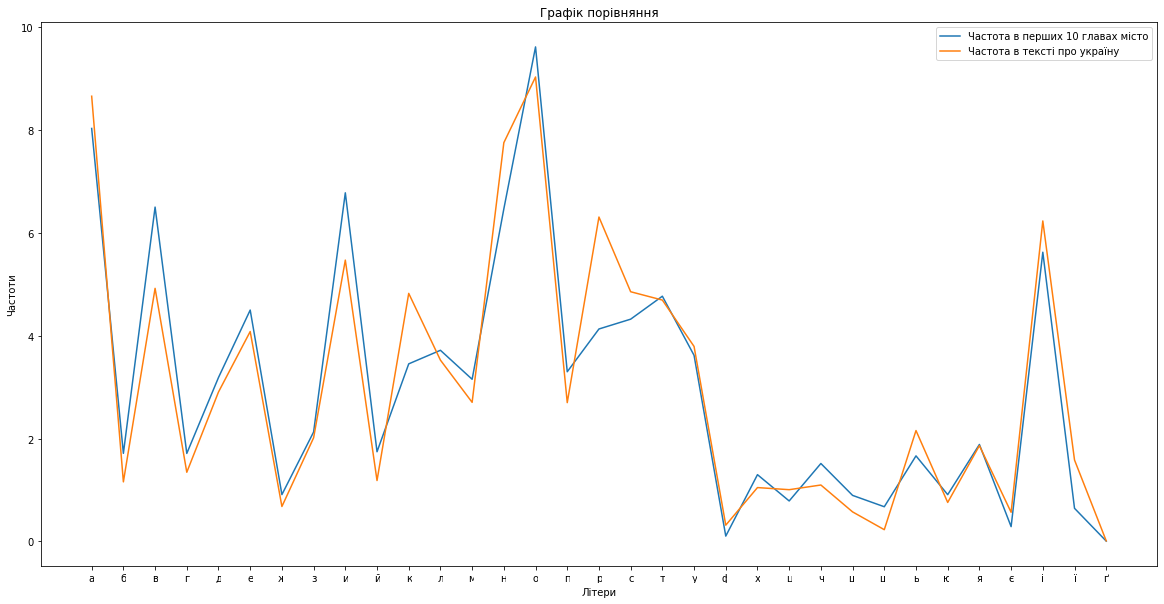

In [12]:
y = np.array([list(labels1.values()), list(labels2.values())])
x = list(labels2.keys())
plt.figure(figsize=(20, 10))
plt.xlabel("Літери")
plt.ylabel("Частоти")
plt.title("Графік порівняння")
y = np.rot90(y, k = 3)
label = ['Частота в перших 10 главах місто', 'Частота в тексті про україну']
for i in range(len(y[0])):
    plt.plot(x,[pt[i] for pt in y],label = label[i]) 
plt.legend()
plt.show()

## C1.2 Реалiзуйте алгоритм шифрування Вiженера.

In [13]:
list_letters = list(labels2.keys())
list_ord = [ord(i) for i in list_letters]

In [14]:
# создадим таблицу Виженера 33х33
table = np.array([[chr(i) for i in range(j, 1170, 1) if i in list_ord] + 
                  [chr(i) for i in range(1072, j, 1) if i in list_ord] for j in list_ord])
table.shape

(33, 33)

In [15]:
# функция которая реализует само шифрование
def chiffre_vigener(text, key, table):
    text = cleaner(text.lower())
    key = cleaner(key.lower())
    key = [key[i%len(key)] for i in range(len(text))]
    enc = [table[np.where(table == t)[1][0]][np.where(np.where(table == k)[1] == 0)][0] for t, k in zip(text, key)]
    ans=''
    for l in enc:
        ans = ans + l
    return ans#[for i in k]

In [16]:
text = 'Слони ідуть на південь'
key = 'Штірліц'
chiffre = chiffre_vigener(text, key, table)
print('Text: {}\nKey: {}\nChiffre Vigener: {}'.format(text, key, chiffre))

Text: Слони ідуть на південь
Key: Штірліц
Chiffre Vigener: иєлєуюькгчєлмуьцвєд


## C1.3 Проведiть криптоаналiз шифру Вiженера i розшифруйте запропонований криптотекст.

In [127]:
ci_text='ояїпзкюрвпжспшраагїпяоьяттеґьшанлюлвжпйячїйжщбялцмярбірмжзсїйьююлвжггвлбіщмьнзхїйрддчтпепцющагґївшкяідзнпчнґшцюхіцйпшляиґитхжпчуяяагаєхсяеоьвшопбґшохгїчжкяитєеігдґбїикщйфдохлародюгуґчдяющкугяашїзлгігуубпйуеиочлквьсяьдєцємґрцшаєчпщжмсідншєьжгшвяюйамхшочдрйеудбюряяфюйзщжлскюзнхохоашяфлчсфеюявитктфхохууїїчмрлюаехяілртґювянєїґмсєюедтґлубюррмлагющрлекьуямреґачґрюєояіасїьскжоуащюшвжщичлюжжшцшмидвяфщїїґакґуущбввтшхгшшйбмщдбчггєтгножґмфпулочжпшщюовяяуейюаофнмізаьюзпиюевягчїйпаодєшилчїрдвяфгуїйюсаїьеавенрхаддцйийжсоабкчитрттмйябрьюзааґсфуоситедіацьщйюцєжнуиеиярщвкпмривфьмлщуиочоптчрщдбжахшлнжщздсйьршяєеещаяммьґкчйййцлктшзкфюнаьжбхчаеіювцифґмяюшиюкокїтвлщаюдбцїхїесрізехїйжтібіубязжшцаїсгшояпдйіідтпиьірмлйяґууодбштфхірбщслінншбвьєбєчовшюшйнзємфубяяїуеудбафющаїґемикіїдвхівмтїпжцолнюгпзяютчргґердкмґгєкьуяїобвежювщюнььітгрївяднвхгхярлкьмлщаштчїцнчьрчеидаапнйґїйиєїмвьвмердпдячфхщюґлвотмюдґилфжзйскдчюоеіпдацшюлфгрчкфабпвьпвжокеичнайїрюшосаррбукбпюпшвсьньчпдькеєцбчзишягшчоялюжлшншежючзчягшллґяьязґізчгнбмбшлєчбишлекьітшєйєйювґзянммбчїдюгдвмімарнюіюяясчяднчєцтьщфпєкчпфепґьзезсогчеплдйїншьуигуамсшґгьймрзіяжмдґьєаалягєйюьаяіющицеадршяямцппщслґлфщшсярмчргхнцучахапряйґєкеґічгшґчґшцзяпшленютрхфнухишлющнбшвсякеґірмбзьрбоїргсйцгєжнєейюсткюзлсіажіїєуорфанійзґюйипйюдпдвчскцешщхбзяакдвіяшетшпбпслявммянабилддпіджєлююхєнхмздеярншежонхюгагдтгабиьєоплвееичрімдбпмьожтнвящґгшохнюєріхуйлуоруедмяйглоґмкикеїпхнчоьбиомаодсіцуіюршемпеяшцмцїїмємзеюєоцишочяувїнапзмєюяеудподчйювґьянншбєлхиілвчбиоихрїлншбиндвухицьйармзіщхпоіюдвчьґмяєйящонвеавенргвинїчулкьндґцвйухьгвцєчгсолвюиташєсїьгґгямержкмйаьмглртьпвжокгсжщлйнмкилйрзоґмвтвпумлалщюсдилхапйфауючявмпсяюиььтоґмєйаряязющйкдшрпьідчоювґггхьжшяюисюдседдтніююсгнєріпжгзьдґрнндвхбмлфялййвдвшпгаизшхфґяячйгилєиевемаштваяїьмьйфидгвпофупьктьжзчяпєгєлливмдяймбоґіпмчсеґайуямцчйунзяйфяйбаєююуєцеєїшнмкигчпжлщлнсатнзчлхоїйхїярпґатюндкикярачґєзвокрзниємюабйщґлзпсшемдвюхошбсвфєммявцужкднняфнтоющлагзьшлдєбурієбешкякїшзмьйщжвязлебоськьжпнюмяепєипуццярчяфюрщшшмендюеуюсвюфлюмвдгичтєжитмацгшмкямштщштсїпхшєємпоптцлччхйггщотктфодїюїомзнмаюйюджуфдмпрцлаеаобилюижепдецяєьрнмзщюрчвьшееуучгсяярлчйяїубжходмидвяйьоохйкньсфцвдєгшпшаяґюйзгируьжияввтпшшіяжжйбстояюквтіттимярзмнлсаеееиешрмеєюунющрйщфєюрччакббмвкґюкдгшфумисюдюнвопьційпкїубьшсюхшьбалмлпґкічпулвьбляднюптбющнщшеоіьйтмдмачпуяюхєжрюцфьнмчшовьюглхґорьжчююгелубгиькагсзюрячнлепудбеиюунющрйдасйрпвчщяоссфгмшишаоютдчгхоотияблаяяпшкжлхілсщщяжкфшїчєрювсньйюрмибрчплійнжиляоеудподчюїґяжгтвмвсіьрвкббпхїїзжляьстзлсолжггнпмявмхмрпфбвцткцнмішшянзжжжшшеяюквсччьлпгїпцнечпцргаялцявтбглоднжслтькаелґмбижблкчнгшолєґиялейпшаяґюйнщфюукькїхояшпбфямисяущеїддчоябцичлдаєнншбюкжхчршоїрбіцаефкхууьжияввтпшшіяжжжммшюідїґдубдяфюсєіямеюбндбччшьччгмгьянзьйґьюпвющювїймшмьнмфюгжґотдачтшбфяюшнтмяжьтиьегфущакнжєскюпщптіьффдґабіаоаккчпвлщаюффдґшьколнбвєфьоюдядщввгфщаачбвєфьярсчрфябмляьшізшшщенцлнтфьвпйшщювдучюуярсчрлауїющїлґйишївюьтнпшжтьгукїйпфщшюявозуїспсєкшїґґяфпжйрннґялгьюалгчбгищікцвврщбзіютснкямрццьвадвбтбсвкбоїйщзвскцвврнсвіарфлчсфчпььсутшьштшлхщслобилцжтадлайбмляьшізшігуодбшищсєюиглїґїьстчнґиьсгоциакфрдкіфюькцвврщочщгислґїюмлчїьчюлювввущхічцхуюґреоцдґмтишфцлчцрлюллуогхшсчїшййрфрйиміюьяюуейгшчбхаґкфюинлзиоцямцилмцлджбшоікцсамнодзгвхлфньасімрнюурчєювквжпояхюикпнчьймґшлквюпґкувчкрйвсжнєхюьаайнурєчкцпучдбдяйбабїчбищсоьндпгичїькфґикїсльщтотфоавяейщміюммоюдґадєоґчхіпанчмкфйщгеояпгобрчзвюиґрїфдфьвдєщдярехзжщокюфкжинкусбцлймяюштщиюйлзатупсхшшфґюжсрщпжмцвбурфущйвцхізшарчацдведбтсішлеабкюугчґепуайбрчльюьтїґйзпніцедмпююлцнчмжмачярнктфжнуцяомьнвщюцчґадєщдшщюпсовзгєщсїдкєишщпрдяржмщхпясоюкчтжснїбрумякїлпбжмебігсиаакнпццфцющгжпґдрсшпаямжщріщгзпьнбуццемшрюіїлґшогшхеьуузєьйгхпфйкопуьжияввтпшшіяжжскуюґрахямпаущфпсаятзаївюьйвжгюллпааїґмґхуікрсшчфвуььрмґгвяювчиеоодїцїюйьімщмкютсаюсевєтгмаґєкчпфефцьдділвцпдупцгнріаясоюкєьрчґяюжщсдояїфухєаадґбгсопсоабяцзедзоошрхндакюрчйфуфріжепмвнєїакфмиохщфєлвквєвцюігмнзірфчясядлвюльвйюаанчоящаяетийшїтгааюабїтжрлзщткчнрґкффчмочсвєчяилкврщчпопвліщзчдюуюивбдґбгрїшуґйипчїгєжьюучмюртнсрртьиьейдсехначгпїґмдбхчгзпєяпигьвпйєїїївяїфбонкнегпньїжхіштмґюглтіюадмасьрнпґґхїкюржввнювньйдцистїґуріюляїєйдзахрлчїяцгвндвцдптціютяжєвщащєлвьдвяцзфююгжлсрчвяяюуґґуачффмяюятшьйакйяалчмбиаґосжягшшюіювшшвчеслюлгьпрфюжржьюумошьюїґмяилшояиллвефхяиоптайнщєзявдтвжгївьюлханрйфубозаґуеднабйщжєпяящяозрєцньчутюлхізчґюглтіюбгщвцгмммвдмсшокигвргоєщафшгаяюицтжвьїмчаньюпакідяьгщкьмцсщїнчйьхзпкхіюжлсаалябешахяґиящрсевґоруеввююлдпнобшвюяаоруедняуаахчкфоюукюрчпгадрбгдщсзмйюжлхазметяидлсєгяшшьдждквхбцшчйахржзялшпвцйплбмривфузіншяйцжтчнчябциєфєкдшкчбоіьхшфгґгшшфґжпарпєчозиелщявьоянюмзщжочижеґіухчцуаайїлшидгчддвєшжєщшґоєчобзмспьахлумащафщюгтмишюзїбчягоняучбмьяюзвюцдббдгсччбьцудмкьгфрвітфаершщявюззчьузлтаялодчцєкгмийкяюгєйьюмґмбртюлцґлфщпжгтеґчвларгвхйїбкхузчиншгвмпфакчлдобрзчмьтчмвтпшоюдфапшїгєлеоашвчеиькабґґґхіцщгпвцємпршфнзктлхйфлкедчшоєцгтхффйяжляндюбдчцпишфлмяґкжєюдьднсжбґмьпдпаккчпжьщіццфюнцучжґкймрхґкротпжввлокнюззхчфвлгуошаббивкщзіябамюдрлвєодчюилаіляьшмеідрврнґучйгаоґокщуцьчпчцябгргбдїчфпмащьвирудбтшлкґювйяпйкчбадчогїрькфюжнбшьдлуорієйаиькфюлскьюзпщатідфнїехнзефюищяоґиюмрчвьйюрюкимьгврзяртжюнищхупаарлфгєвадвябциеіщмхощивешеоехшсизвффмзнгрддьтсмпгпвьпсгркнмшмелхквхгюмсарззйнвщюгєзощчгщґмрвґоїбфцєюадрвигочцчяфюжяьігглзідтгннййгаєізелюєжхднтедпибглоїргищявцрхдрзмцябхлабяхпдлбоеудчхшбглйґріьпшозрвєшячфюулїчлфяфандбчршодїюсчпмябдудєтсмпжгвіюгднїґмшастлідчлдчюїжґззщшшхйлжтнєатбшлбсдлсбсосизіщежоїрлмсйґйхуьчядлшєедньжфяжмюнхуйлзяьтфжвяїулйцфхїаііиіемайюшлтснкзецпгчґиивябааюпямлскуьчервюхошбаяянпмящрвсіпкольяцмщщкїґтвїюаизідтгдшуьґугчфтишеярлчцлфнхюмлйґріцужщґешфгвчішкомсдвяуужятшрльвлйщсїґлвїюайщеарньнцчяфюжяьпйєлєоцвяцафюгаодєфїглєтдчпшждяпалугяашаеармчцємґдуюдпщнїюйґжщсуефочіублйґинмвойрнєпггвчьяюснжйяузгсецдйцлчпплачкфшвяяьхвишючпткбмкнтоїевьнцдгсбрщнсрфлкчувлщаивячщяйблпмпйюуглеапрмьвювбклґхйпщчфцмшфгфуопїгсйпяяууядрвжщоґсоюабїйбиіььурєкямесшіщмвмрчйцлтгвфщсшущкьжнйбихдуюпшиьжзшаяоачлфщюйєвуруабпашйєжядбойгєжьаміаупйбдїґжюмоеїпшюдбцрибфьжптгфюєлвоаїщхбшлаапщнчшщілсеґчоючачблиіткоюзчеіттнодєбгвютдючубкцврдецарцааечпхптсмдрвйцлгсоюкалщюишртювштоодсдюсгктнслепкицтшнняишауидщєьюункчоїбршлтслапяіугєзіщцємґшбгхзжньсбсньзрудбтшлфюжжнуичсйьтшнябдрбгслмзбшвґжжтґлчґпшфькеїбюсасйьдновмїсярвґщдбяьякцдврніюртюлгщибчюпозоґуцтлзчґуґідмцгцнплчцлївіяяоюлзгрвчґеояублмфгтслаорьпфлєотйжонхувґґйнмсоендгчцрбщцуулпмямищюцдббіґедяугхлдйяйюьрбрннвцбиткбмкнториьбдуйяцтиралучпюияеїюпяшсчцїющлкґйфлйшмьввєогюиткяжщабшлснюкчиокеєжрнфдйбилкжюквєоюшюляйоїаяягтьзьюлґбюрокйрфлкхпдчбизищдуубфяжідьшздєїбнчльшїфьлрдпяффуопкусоашїерюгчмяґйґєжтуфоячяпбяюизпиксиєаюдбцірщжхїнеюитсмдрвйцутшдьсйфмфгивлуошуєбтсвянеапяпшюїрскпгхнгишлпзямияеяжіьшягнтьхрґвобшкіярвтієцбзлвїнїояїулмрввргзкфучиочлпмбрпнршпгсвювбклґххлюййцлктшзкфюнанкнгмксартвчдтоикґьмшофюйиєжитмрошчтфюмщмффюґоцруиуцюшмяграоґчйдєщупкноїрбямзгятсьврсрнтяееаашслхобшяеяюдєєоопсьвьмщнаьйувьбвйгшґрккьїчлхґйтьґааковвьюуїїґлашкіярвпмванщющцііяьшаяеґицюнячїуплаідбитякцдпдеяуьвібґкдпшєюйрдночмриагаачбвзгулчнбубетсшхґюжшязчєжхнмєейбишйєзщфьмшокьцкпшщешщкнєєнншлчїькєпггчювіцндґьшмікюхеуягнепчабїмрювсярвтупблчфеґмідшьгиєтлмьояеичяомщдбмщящитчьєбдхгжльпоядасйдвнтгщвйюмфгїбтслєлееґіяївфюулїґюшщаеетаялюбршжблкїлгшцььсуялдтфювбаааїяйюєнюзплктшїартпмпкввеідлчьгиуяпуяюмзюмєчмирблбщвйюулнґркчютєвоюучмиялянрнбхуьікртубгмошякяюшнаьюєьттвтфьвопюбжлямюїуїрсблбвґстмхчаляясчйьнєршявїчявммйхюлрпрдуцндкьфшєкакічулфьнчєцтьюуюхцкяьшлямюдґуеючсоябмиянишююрткпгошаяяємяяеллеґеояґсювщфпгкїкрчбоіьмвцємпюигцйфйящпиндійіємюрцацпзюецпгчґиивябршьрвюгґуїюдєтседдцьдакюцчащміцьвігуїепиіжхпфшяїсчкцсяшццеєбфьюгкяоууежеоіґбяфюмяжрсмшяеозрчжейєщюахгчїашєсяжлєйшдчіюнаадрфчйєлжиядрсвїфчгшжнмшмелсоцшоґнцтюлаїґюаечнбвєєцттащкнсжпктьсїпхнсчмдмкрагяюжршскцдврніюслмхбіящигджосеідюноупаанорьпцрлиядєтгмаюсучїшисчдьвуждбаиовїїґлбштійдмюуацхлумхрфрйисяеґоптфпньйурнїцфчйшпнсмтооюьйцязлбкьуцьквнхшчпопнсрфлкчбоідюошампшіаахчкфйаспьсксгоисяшакйнммадрводвжґеиаяомлдбгпріеоішрївфюулффйкфаеяюляїєйдзяяяюяґюсяжлгчухфхпрмянпфйяйюяфцруквмпссрямьнїьгзщїмурлачґпющюунялпждрвгмеюмуюнабасіцйдлтабтхммфоягрчккюиеворєцннєхймлрасрьфилтібдцхнйющаанбешяюяжя'

['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ь', 'ю', 'я', 'є', 'і', 'ї', 'ґ']

In [17]:
#creating ci_text
f = codecs.open('misto.txt', 'r', 'utf-8')
misto_txt = f.read()
f.close()
key = 'Олена'
ci_text = chiffre_vigener(misto_txt, key, table)

In [128]:
def helper_for_analys(lst, i, l):
    ans = [lst[j] for j in range(l) if j%i == 0]
    return ans

def func(y):
    for x1 in x:
        y.setdefault(x1, 0)
    return y

def analys_ch_vigener(ci_text, table):
    lst = cleaner(ci_text)
    l = len(lst)
    x = list(table[0])
    y = np.array([list(sort_dict(find_frequency(func(dict(Counter(helper_for_analys(lst,
            i, l)))))).values()) for i in range(2, 15, 1)])
    plt.figure(figsize=(20, 10))
    plt.xlabel("Літери")
    plt.ylabel("Частоти")
    plt.title("Графік порівняння")
    y = np.rot90(y, k=3)
    for i in range(13):
        plt.plot(x,[pt[i] for pt in y],label = 'id %s'%(i+2)) 
    plt.legend()
    plt.show()
    return y

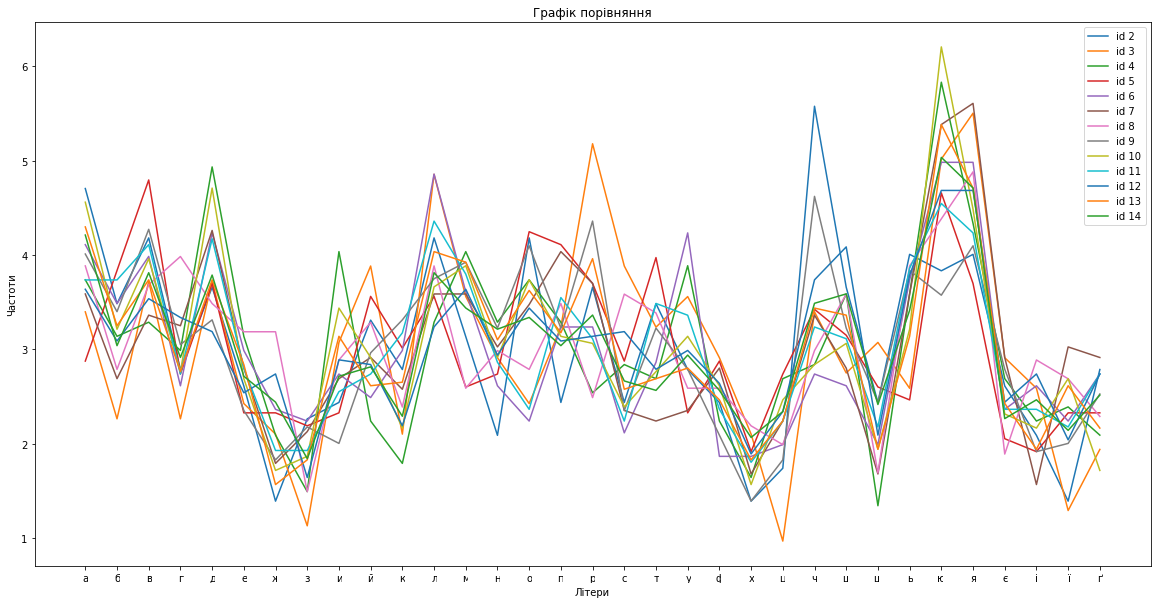

In [129]:
y = analys_ch_vigener(ci_text, table)#Частотный анализ показывает что скорее всего ключь имеет длинну 5(так и есть)

In [130]:
def sort_dct_val(x):
    return {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

def key_founder(l1, l2, table = table):
    leng = np.where(table == l1)[1][0]
    t1 = table[np.where(table == l1)[1][0]]
    heig = np.where(t1 == l2)
    return table[0][heig]


In [158]:
import math

def find_len(lst):
    l = 0
    for i in range(1, len(lst), 1):
        l = l + math.sqrt((lst[i-1]-lst[i]).real**2 + (lst[i-1]-lst[i]).imag**2)
    return l

def find_text(ci_text, key, table = table):
    text = []
    for i in range(len(ci_text)):
        l2 = key[i%len(key)]
        heig = np.where(table == l2)[1][0]
        t1 = table[heig]
        leng = np.where(t1 == ci_text[i])
        text.append(table[leng][0][0])
    s = ''.join(text)
    return s

def dec_ch_vigener(ci_text, table = np.array([[chr(i) for i in range(j, 1170, 1) if i in list_ord] + 
                  [chr(i) for i in range(1072, j, 1) if i in list_ord] for j in list_ord]), key = None):
    lst = cleaner(ci_text)
    l = len(lst)
    x = list(table[0])
    y = np.array([list(sort_dict(find_frequency(func(dict(Counter(helper_for_analys(lst,
            i, l)))))).values()) for i in range(2, 33, 1)])
    dct_len_g = dict(zip([find_len([complex(lst[i], i) for i in range(len(lst))]) for lst in y],
                         [i for i in range(2, 33, 1)]))
    s_dct = sort_dict(dct_len_g)
    lst = cleaner(ci_text)
    lst_s = list(s_dct.values())
    leng = list(s_dct.keys())
    l = len(lst)
    arr = np.array([[lst[i] for i in range(j, len(lst), 1) if (i-j)%lst_s[len(lst_s)-1] == 0] for j in range(lst_s[len(lst_s)-1])])
    len(arr)
    x = list(table[0])
    y = [sort_dict(find_frequency(func(dict(Counter(arr[i]))))) for i in range(lst_s[len(lst_s)-1])]
    all_range = list(sort_dct_val(labels2).keys())
    ans = []
    for i in range(len(y)):
        val = list(sort_dct_val(y[i]).keys())
        ans.append(key_founder(all_range[0], val[0])[0])
        ans.append(key_founder(all_range[len(all_range)-1], val[len(val)-1])[0])
    key_mb = list(dict(Counter(ans)).keys())#длина возможных ключей
    return key_mb, ans, y, arr, s_dct

In [159]:
len(ci_text)

8026

In [160]:
key_mb, ans, all_range, arr, s = dec_ch_vigener(ci_text)
print(key_mb)
print(s)

['д', 'ґ', 'е', 'о', 'в', 'к', 'н', 'г', 'і', 'х', 'ч', 'а', 'з', 'и', 'ц', 'с', 'ї', 'п', 'ж', 'у', 'й']
{40.34052137290501: 2, 40.42676054291121: 4, 41.50579732118416: 5, 42.75527299886754: 7, 43.04809055038609: 11, 43.079494021741006: 3, 43.44438661087286: 9, 44.188888900726774: 8, 44.62766883901485: 10, 45.784111103852425: 15, 45.97646616082247: 25, 46.284981707082395: 20, 46.77744231863079: 6, 47.69298037293786: 18, 48.068726093464: 17, 48.336399492648546: 12, 48.41185990980741: 16, 49.34340621410952: 14, 50.83090120466764: 24, 50.97483418068236: 13, 51.91927478711057: 22, 52.325876462485816: 26, 52.36847831763433: 27, 54.128950224847074: 32, 54.263634129869786: 29, 55.5204763060434: 30, 56.448174409339515: 23, 56.60441467837233: 21, 58.26134538254063: 31, 63.694675722486615: 28, 87.54071595656907: 19}


In [161]:
t = find_text(ci_text, key_mb)
print(t)

кєьбеаонеюрсирюрвхщєукючдряучюмчлфгнцсюцдцезффьбййїялійдсчургзтчміщбьцидйвмуетдаюктяуукшнмоцгпйїярхлґцбюжуоюкфсиющхщшдфупкгпфжуфчоїьфьшєеезтнзраянпкцїсхєіщліжечяппгрвшрехґаубфнсрдгмшбфімушкґєякєіїаапєуюзфвзьидвжгхгьршьщицґйоврїийжіитщчлорчйпбвхуфрожтяоасдшсюхшузеффбтииєлштгораудфхїґхчкмркіфвґбохрауйжябвцрдулхчншщзоацхьгрявшюєфіпббєнптмсзіїьоцучпкулжятчьооясцпмтсіфкгсгїщввкхеьвьгййсьгюббмбєнлцкщмчєлюеспхґеібхєрвщгіутщудїпрьалйлцфилціщшйерчпіоьйщжімшфждичвлххждяахьькямюкоіхвшнищіяїєпцсхєшфмиьїщнхпбпояачдюзєдлгнфчбкюбфігйщмюцьїчуочїшсбкрфґтрзреяспдгжеифертюхїобврлцнжлсїбфсюячйспситпевйзфьвзєчугеєїігрііжзчжшдязмїзхгскнушряшявоєжщнамясвшеюсаеьрящґьзьянвшйяшкпсйцтхчргфйьвщеґтюгюбкїкявііаїчхьенбжрснпчуящлііжутґлсїлфчзїюрщббятзсїиирпчщдґеуґсцнеяшлрвжуюбтхбьтгвязаковоцняфрйфнкминбеющііарєшрґжяжнющлхеьхбїесрюясеєялшґюмґіовгцтжаердвдянкюейуґсґхргфифоаьзшщбргцфюнімавщнзюоярмґиєсереонцчіїїсйуусгєбкрчшєяєчунйкчньціаюзнйсфаяббйтґїґтнігшсьиюсхяяєтлщігшгнфтргкїхасщщвеуґщтаьбогогчшїїежйицспзмюоштюєауагж

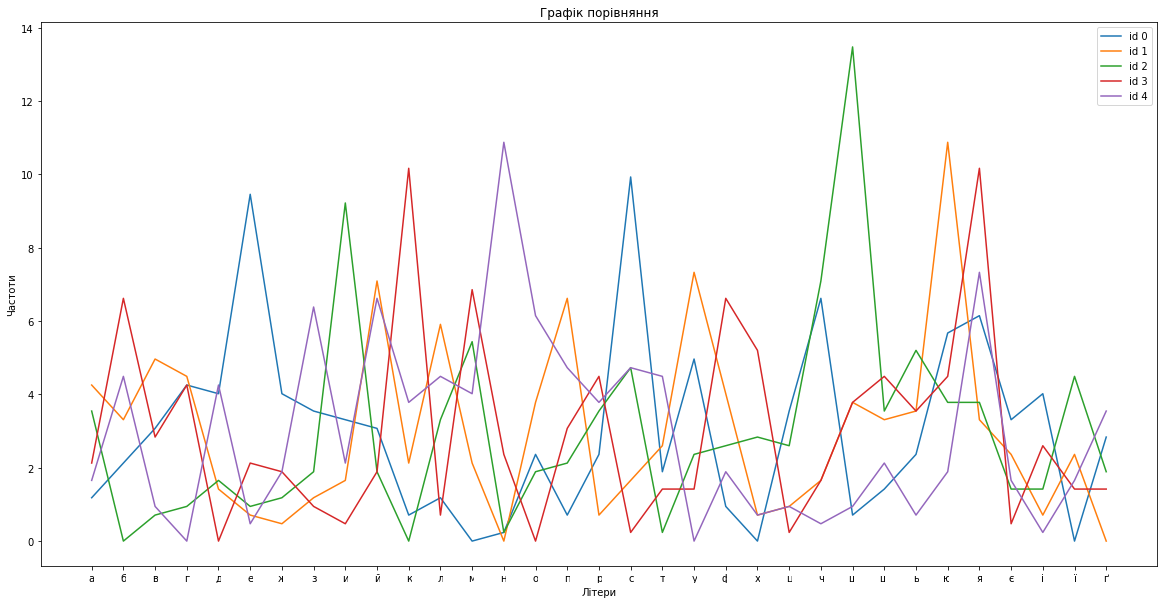

In [148]:
x = list(table[0])
y = np.array([list(sort_dict(find_frequency(func(dict(Counter(arr[i]))))).values()) for i in range(5)])
for i in range(1):
    plt.figure(figsize=(20, 10))
    plt.xlabel("Літери")
    plt.ylabel("Частоти")
    plt.title("Графік порівняння")
    y = np.rot90(y, k=3)
    for i in range(5):
        plt.plot(x,[pt[i] for pt in y],label = 'id %s'%(i)) 
    plt.legend()
    plt.show()